# Customer Segmentation 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [12]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
data.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)': 'Spending Score'}, inplace = True)

In [15]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory data analysis

Text(0.5, 1.0, 'Gender')

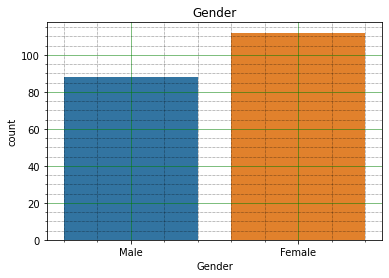

In [16]:
sns.countplot(data['Gender'])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Gender')
plt.title('Gender')

Text(0.5, 1.0, 'Age')

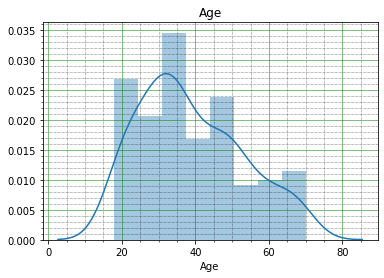

In [20]:
sns.distplot(data['Age'])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Age')
plt.title('Age')

Text(0.5, 1.0, 'Age')

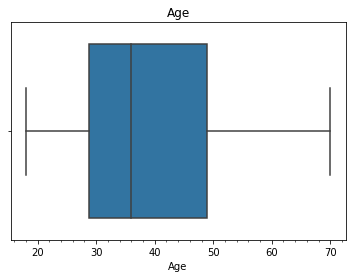

In [22]:
sns.boxplot(data['Age'])
plt.minorticks_on()
plt.xlabel('Age')
plt.title('Age')

Text(0.5, 1.0, 'Annual Income')

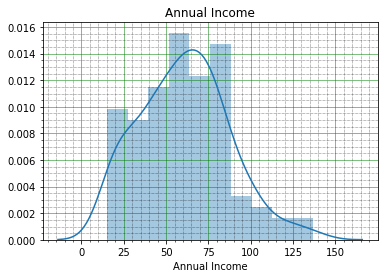

In [23]:
sns.distplot(data['Annual Income'])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Annual Income')
plt.title('Annual Income')

Text(0.5, 1.0, 'Annual Income')

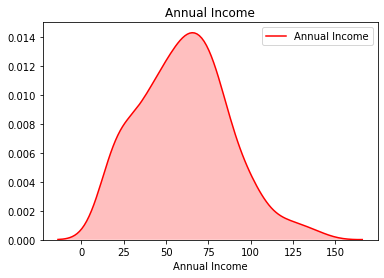

In [24]:
sns.kdeplot(data['Annual Income'], shade=True, color="r")
plt.xlabel('Annual Income')
plt.title('Annual Income')

Text(0.5, 1.0, 'Spending Score')

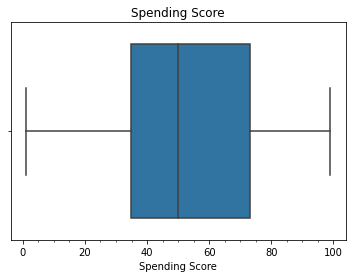

In [26]:
sns.boxplot(data['Spending Score'])
plt.minorticks_on()
plt.xlabel('Spending Score')
plt.title('Spending Score')

Text(0.5, 1.0, 'Spending Score')

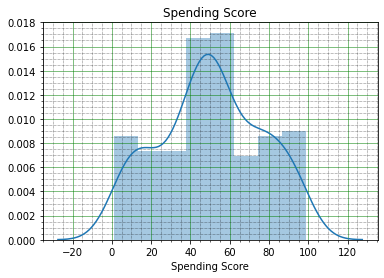

In [27]:
sns.distplot(data['Spending Score'])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Spending Score')
plt.title('Spending Score')

In [40]:
features = data[data.columns[1:]]
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [45]:
cluster = KMeans(n_clusters=6, random_state=0, n_jobs=-1)
model = cluster.fit(features_std)

In [46]:
target_predicted = model.labels_
silhouette_score(features, target_predicted)

0.44801727218328713

For n_clusters = 2 The average silhouette_score is : 0.33547192894004574
For n_clusters = 3 The average silhouette_score is : 0.35880977401117803
For n_clusters = 4 The average silhouette_score is : 0.4039582785148566
For n_clusters = 5 The average silhouette_score is : 0.41664341513732767
For n_clusters = 6 The average silhouette_score is : 0.42742814991580175
For n_clusters = 7 The average silhouette_score is : 0.4188056949620008
For n_clusters = 8 The average silhouette_score is : 0.40694842797445224
For n_clusters = 9 The average silhouette_score is : 0.4207420987392564
For n_clusters = 10 The average silhouette_score is : 0.3991914449618633


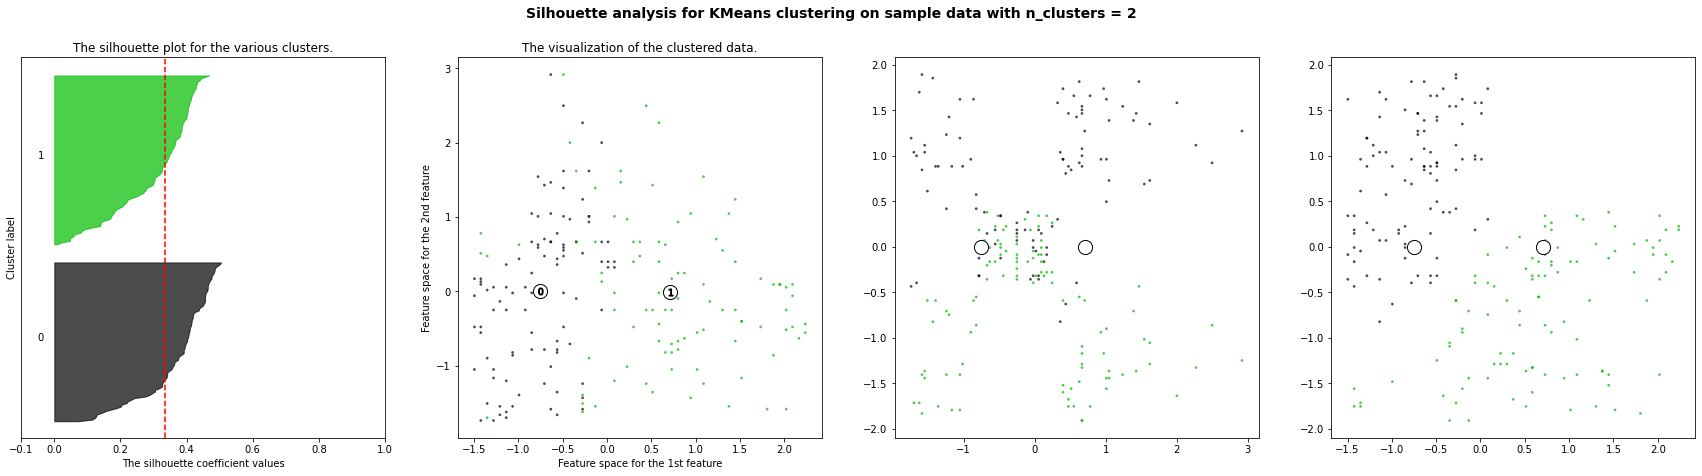

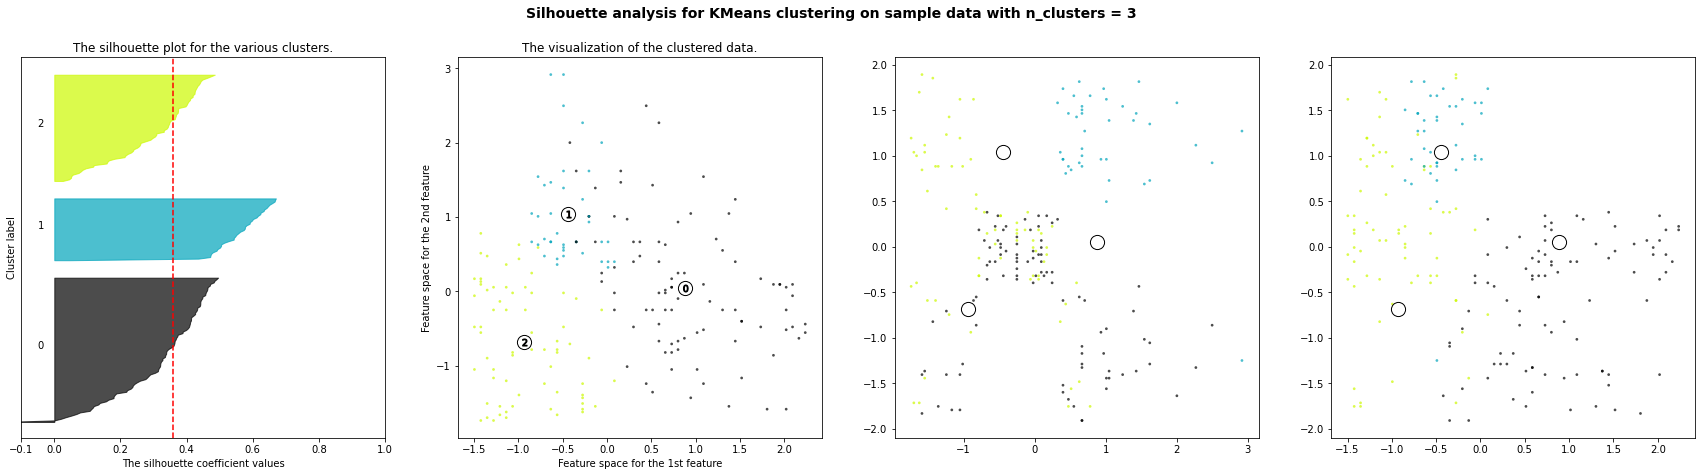

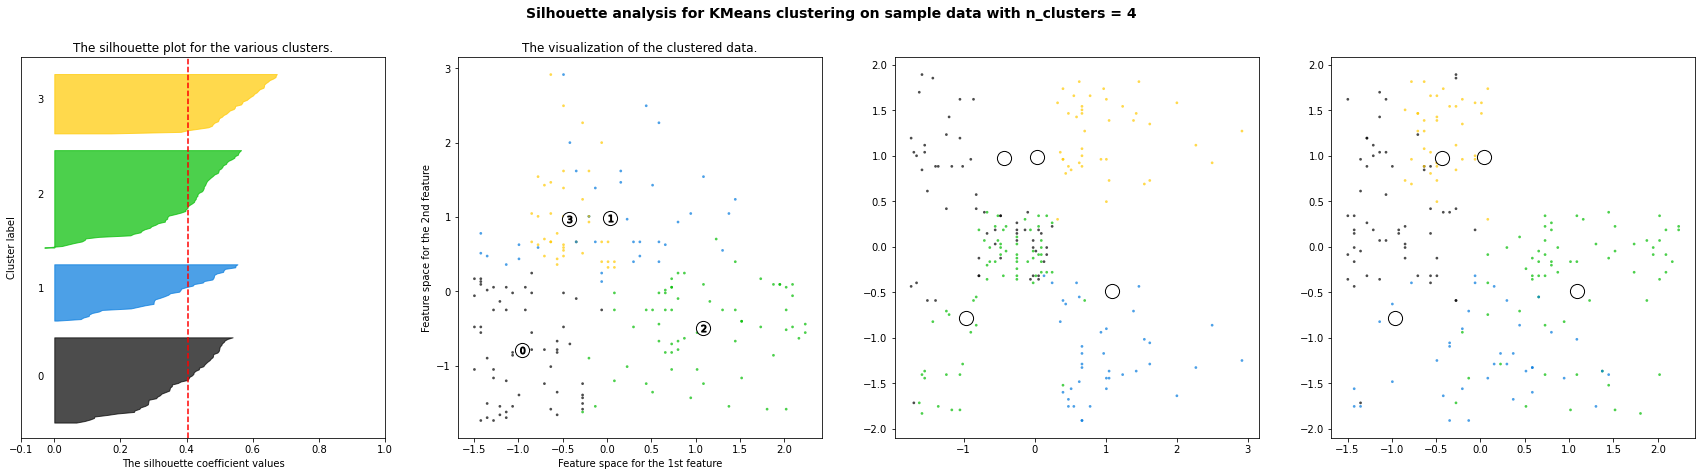

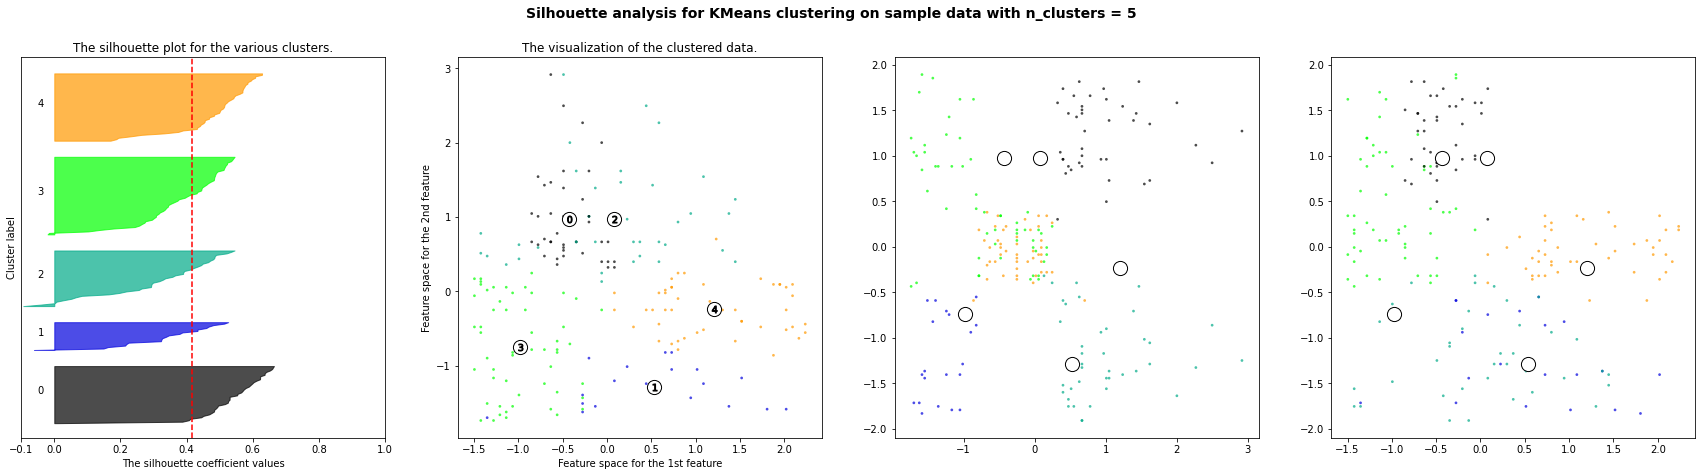

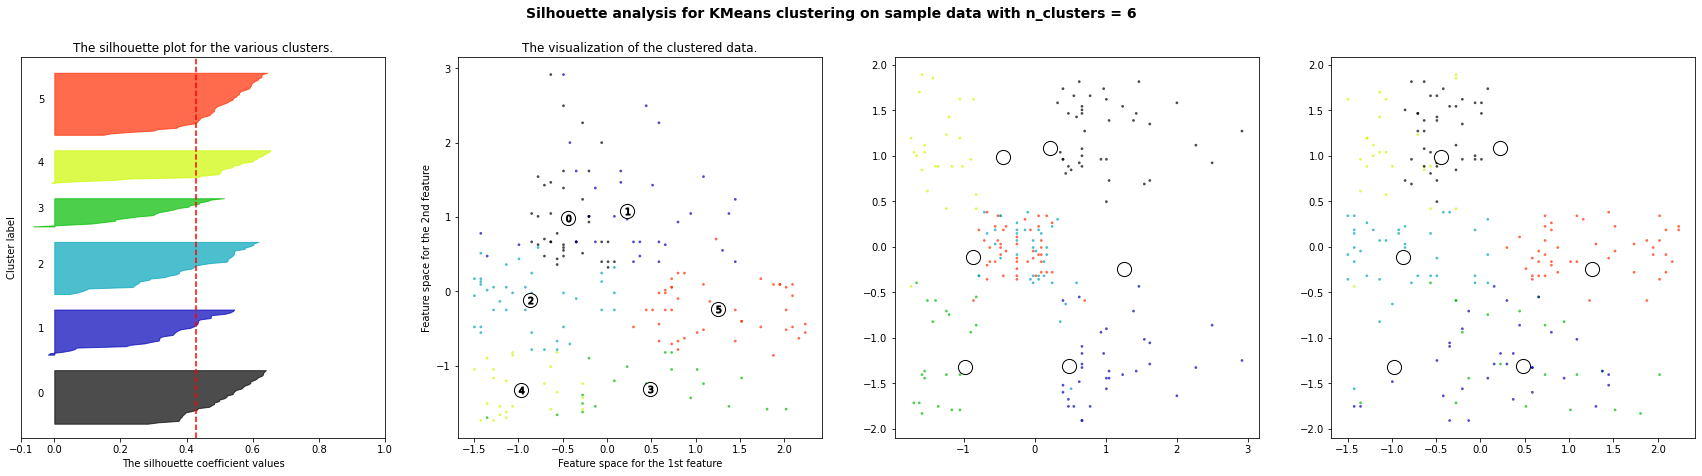

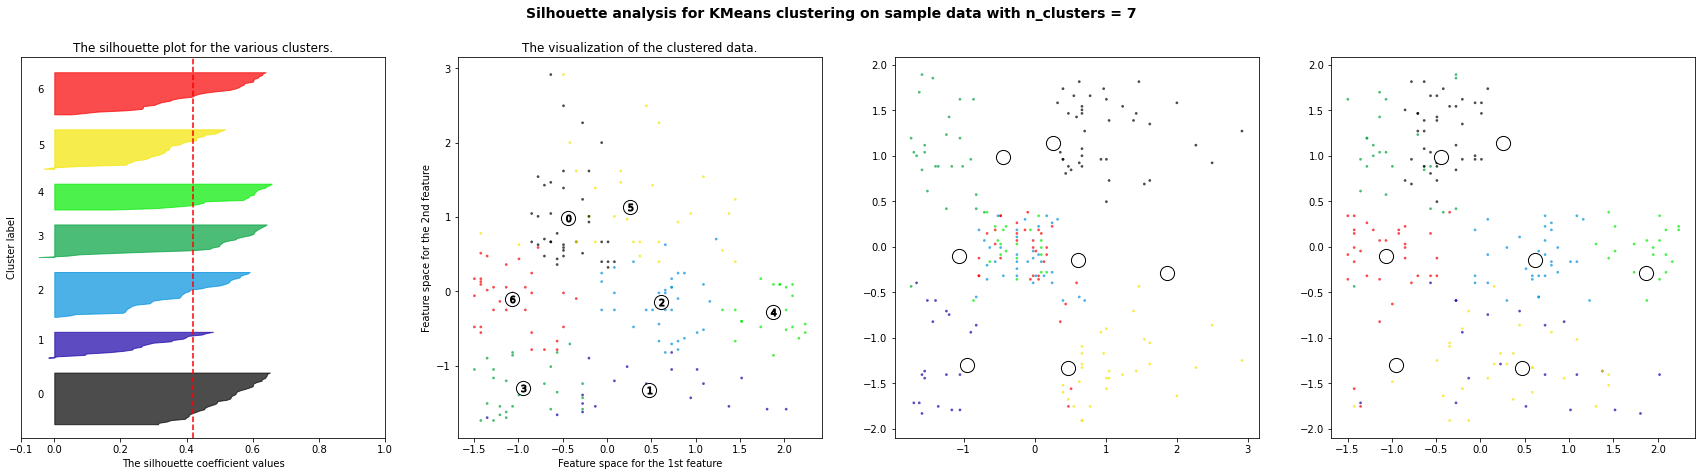

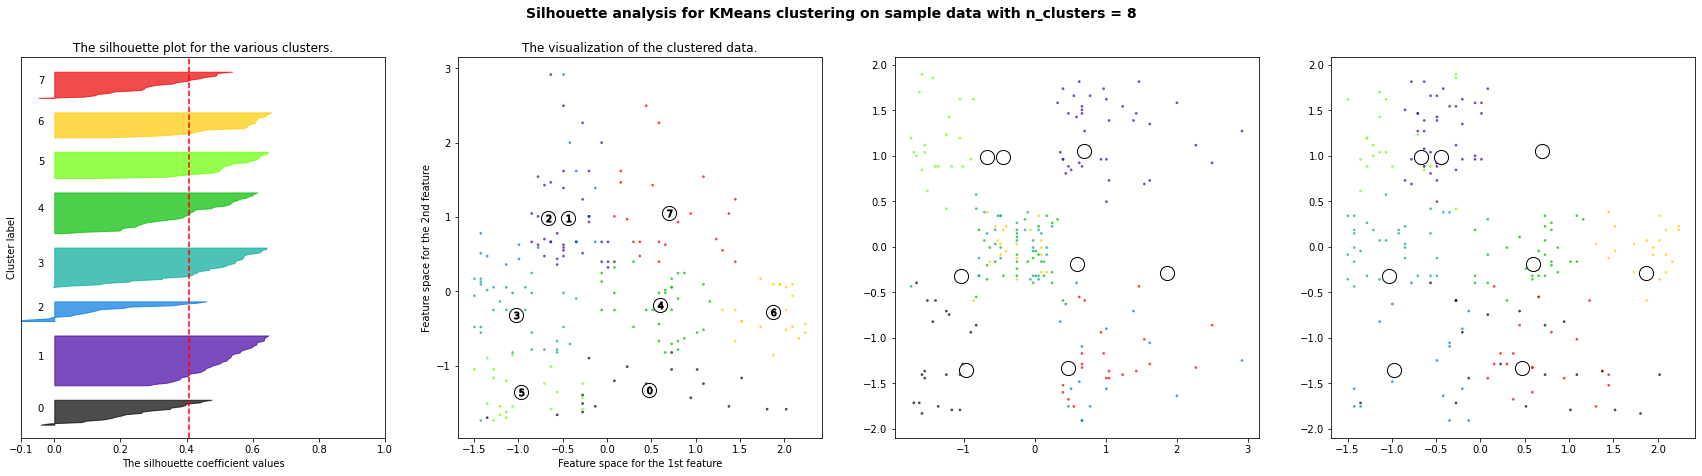

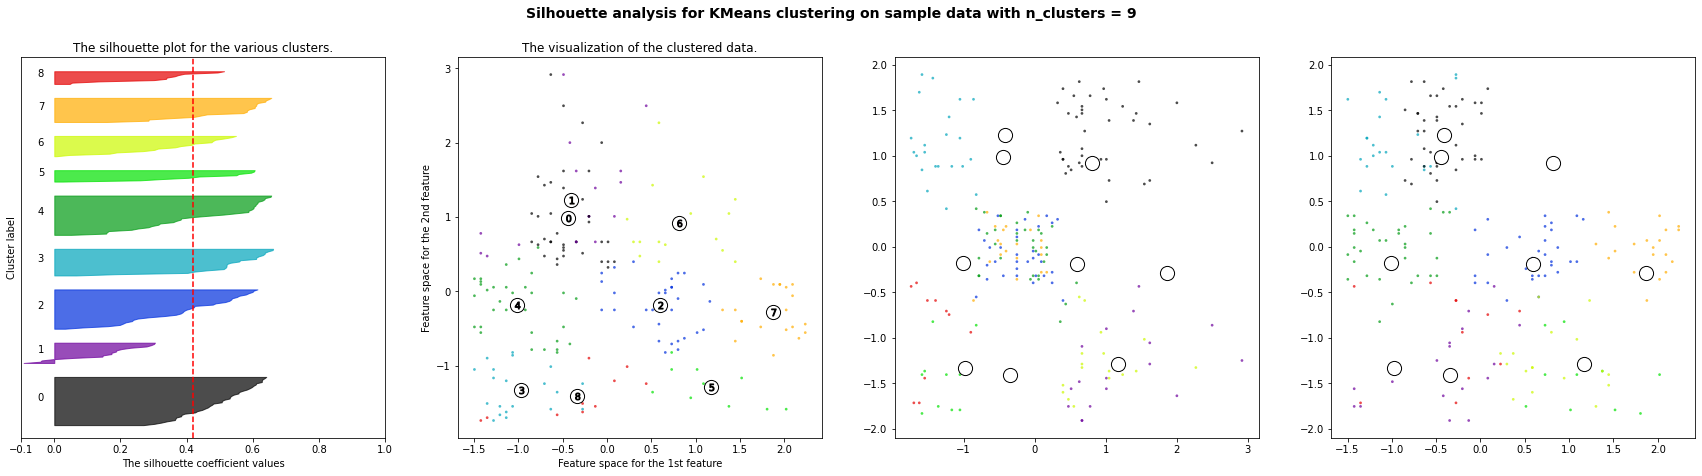

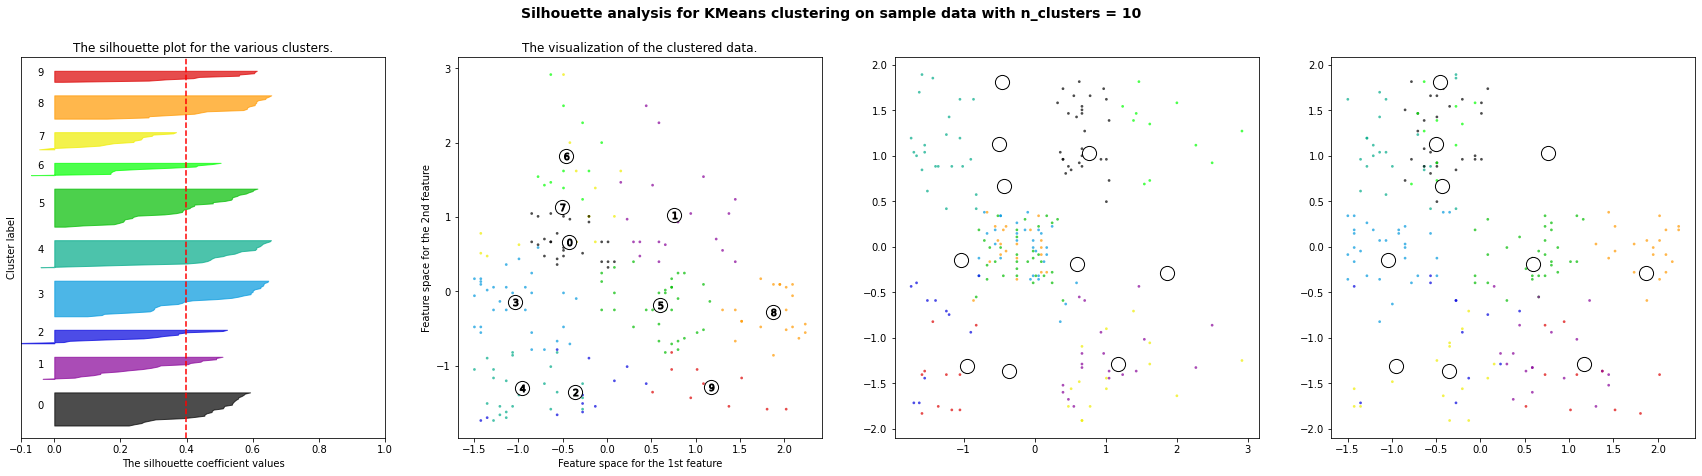

In [76]:
scores = []
range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4)
    fig.set_size_inches(30, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(features_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_std)

    silhouette_avg = silhouette_score(features_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)


    sample_silhouette_values = silhouette_samples(features_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_std[:, 0],features_std[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax3.scatter(features_std[:, 1],features_std[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax4.scatter(features_std[:, 0],features_std[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    ax3.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    ax4.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Text(0.5, 1.0, 'Silhouete Average Scores')

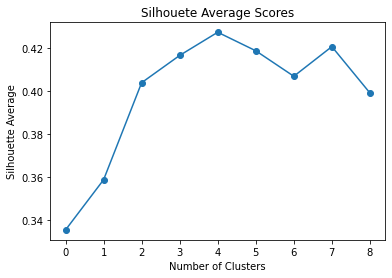

In [69]:
plt.plot(scores,marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Average')
plt.title('Silhouete Average Scores')

In [70]:
cluster = KMeans(n_clusters=6, random_state=0, n_jobs=-1)
model = cluster.fit(features_std)

In [71]:
target_predicted = model.labels_

In [72]:
target_predicted

array([1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 5, 4,
       5, 1, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

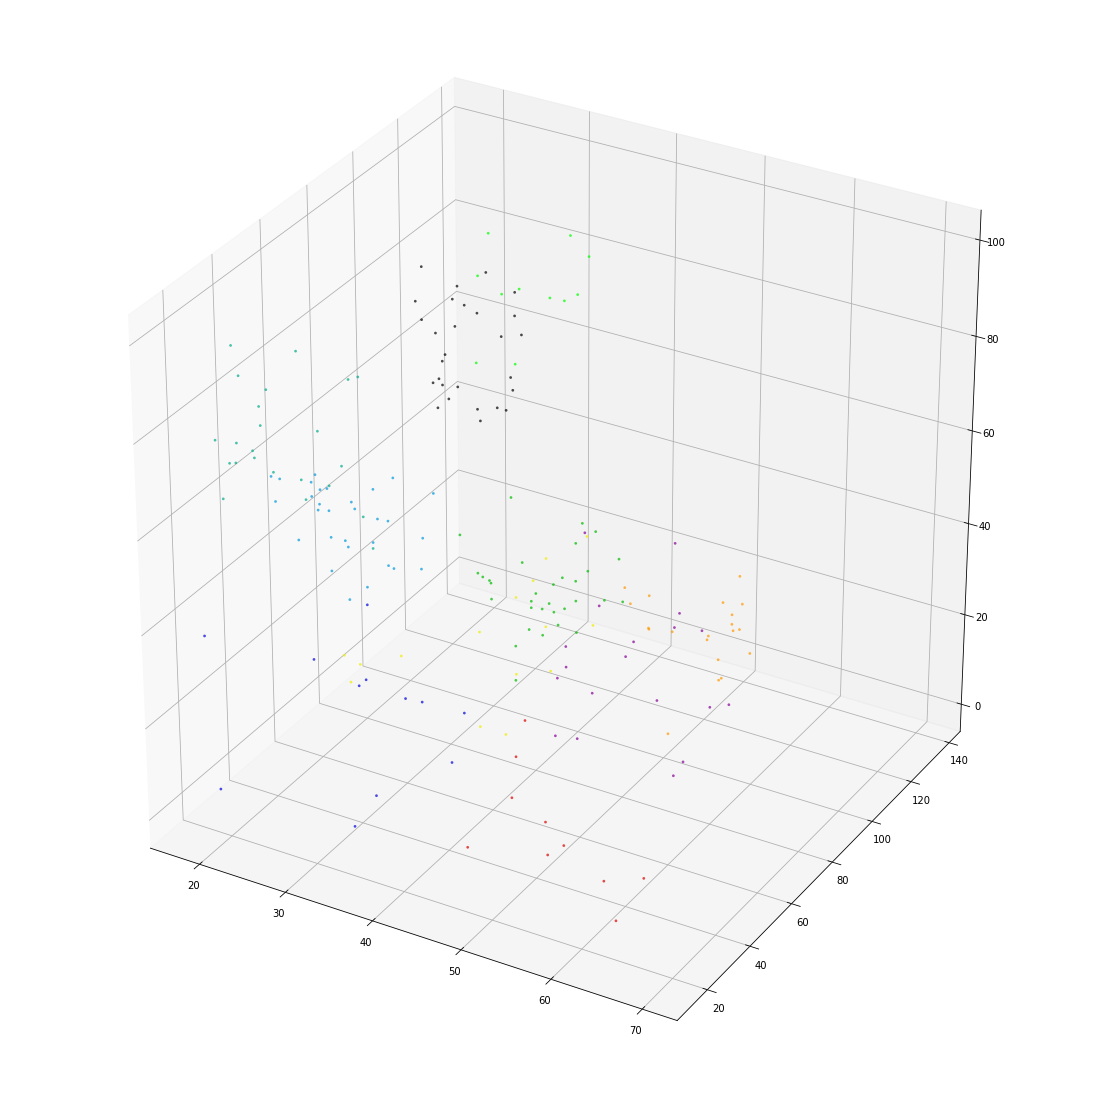

In [94]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
fig, ax = plt.subplots(1,1)
ax = Axes3D(fig)
ax.scatter(features[features.columns[0]],features[features.columns[1]],features[features.columns[2]],  marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
fig.set_size_inches(15, 15)

In [89]:
model.cluster_centers_

array([[ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.99396865, -1.34734766,  1.06404834],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.44191719,  0.99158305,  1.23950275],
       [-0.85043527, -0.14894113, -0.04147777],
       [ 0.47895722, -1.30822992, -1.19644353]])